In [1]:
from mtdScope import scopeEmulator
import matplotlib.pyplot as plt
import numpy as np
import time
from jupyterthemes import jtplot
jtplot.style()
#import mtdProcess as mp
        
#load the sample data to test
se = scopeEmulator()
se.loadData('data/FBKsensor_LaserTesting/Batch2_6-3/HV110HP_DG.hdf5')
#se.loadData('./HV160_lowPower_100mV_11340R.hd5')
se.sliceEvent()
se.showEvent(2083,[1,2])

<Figure size 640x560 with 1 Axes>

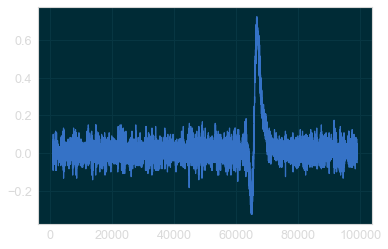

In [2]:
points = se.getEventYNormalized(100)
ntrun =int(np.floor(1000/se.dt))

f = se.simulateCFT(points[0], points[1])
yy = f(points[0][ntrun:-ntrun])

plt.plot(points[0][ntrun:-ntrun],yy)
s = np.where(np.diff(np.sign(yy)))
jmin = yy.argmin()
jmax = yy.argmax()
x = np.where(np.diff(np.sign(yy)))[0]
arr1 = np.where(x < jmax)
arr1 = arr1[0][-1]
#x[arr1]

In [3]:
ts = se.runTimeWalk(0, se.nevent, 1000, 'linear')
dt = ts[0]-ts[1]

processing the 0th events...
processing the 1000th events...
processing the 2000th events...
time consumed: 10.045352935791016


54873.684 951
54581.793 970
38.185345


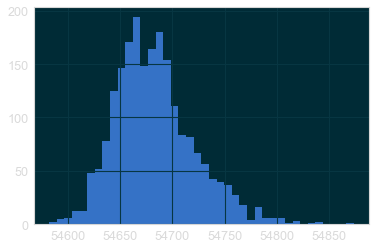

In [4]:

print(np.amax(dt),np.argmax(dt))
print(np.amin(dt),np.argmin(dt))
plt.hist(dt,bins =40)
print(dt.std())


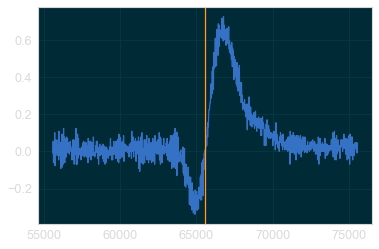

In [5]:
se.debug_cft(848, 1, 'linear', 500)

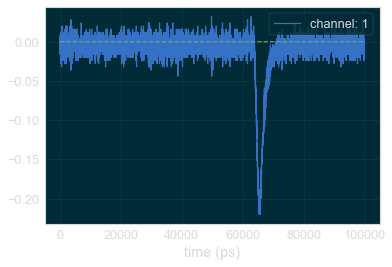

In [6]:
se.showEvent(2083,[1])